# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='http://drive.google.com/uc?export=view&id=1X2gCNVx0EXfDFtzPCF5FoXwJIWObmdep' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [0]:
import torch
from torchvision import datasets, transforms
import helper
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

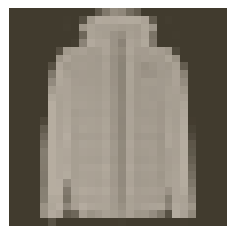

In [14]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [0]:
import torch
from torch import nn
import torch.nn.functional as F

In [0]:
# Definining a 2 fully connected layer with inputs of 784 and output of 10
class Mnist_Model(nn.Module): 
  def __init__(self):
    super().__init__()
    # First fully connected layer 
    self.fc_1 = nn.Linear(784,512)
    # Second layer - hidden 
    self.fc_2 = nn.Linear(512,256)
    # Output Layer 
    self.out = nn.Linear(256,10) 
    
  def forward(self, x):
    # Pass forward with activation functions 
    x = F.relu(self.fc_1(x))
    # Second layer with activation function 
    x = F.relu(self.fc_2(x))
    # Last layer and output with a softmax 
    x = F.softmax(self.out(x), dim=1)
    return x 
        

    

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [0]:
# Creating the network, define the criterion and optimizer
model = Mnist_Model()
# Define the loss using CrossEntropyLoss 
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [19]:
# Training the network
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten Fashion - MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        # forward 
        output = model.forward(images)
        # calculate the loss 
        loss = criterion(output, labels)
        
        # apply backpropagation 
        loss.backward()
        # apply the optimizer using Adam optimizer 
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.7381397639510474
Training loss: 1.6567821292989036
Training loss: 1.6266726235082662
Training loss: 1.6144347183231607
Training loss: 1.607225946653118
Training loss: 1.6023571838193864
Training loss: 1.597339231322315
Training loss: 1.5933130613522235
Training loss: 1.58927052107447
Training loss: 1.5866063224481368


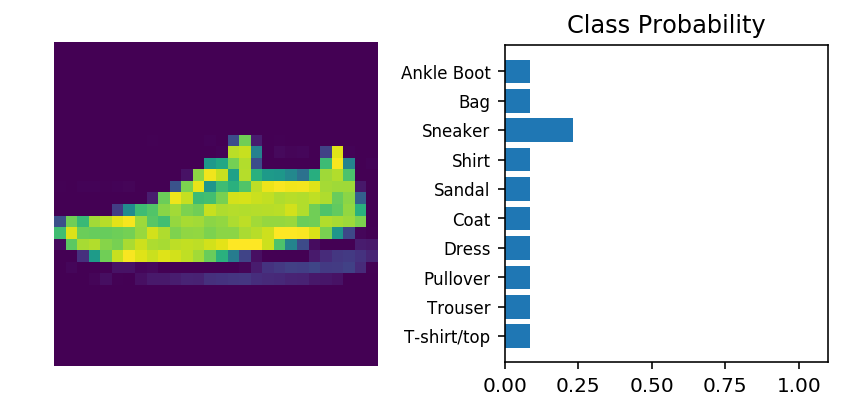

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
logits = model(img)
ps = F.softmax(logits,dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')